# Description
The tenth practical propject in the [Super Data Science](https://www.superdatascience.com) [Python 3 Masterclass](https://www.superdatascience.com/courses/python-3-programming-beginner-to-pro-masterclass) is data analysis of [avocado](https://en.wikipedia.org/wiki/Avocado) prices, culminating in the user of [Facebook Prophet](https://facebook.github.io/prophet/) to predict future [avocado](https://en.wikipedia.org/wiki/Avocado) prices.

In [17]:
# Installing Facebook Prophet outside of the workbook, caused errors when making predictions in later cells.
# Internet research suggested that installing Facebook Prophet inside the workbook,
#  while running from an elevated command prompt would work better, which it does.
pip install fbprophet

Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet

## Exploratory Analysis

In [19]:
avocado_data = pd.read_csv('avocado.csv')
avocado_data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [20]:
avocado_data = avocado_data.sort_values(["Date", "region", "type"])

In [21]:
avocado_data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
51,51,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
9177,51,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
103,51,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
9229,51,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
155,51,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,BaltimoreWashington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18213,0,2018-03-25,1.55,1559967.20,121007.94,342853.10,1070.24,1093861.09,902774.79,190941.84,144.46,organic,2018,TotalUS
9102,0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West
18225,0,2018-03-25,1.60,271723.08,26996.28,77861.39,117.56,166747.85,87108.00,79495.39,144.46,organic,2018,West
9114,0,2018-03-25,0.84,965185.06,438526.12,199585.90,11017.42,316055.62,153009.89,160999.10,2046.63,conventional,2018,WestTexNewMexico


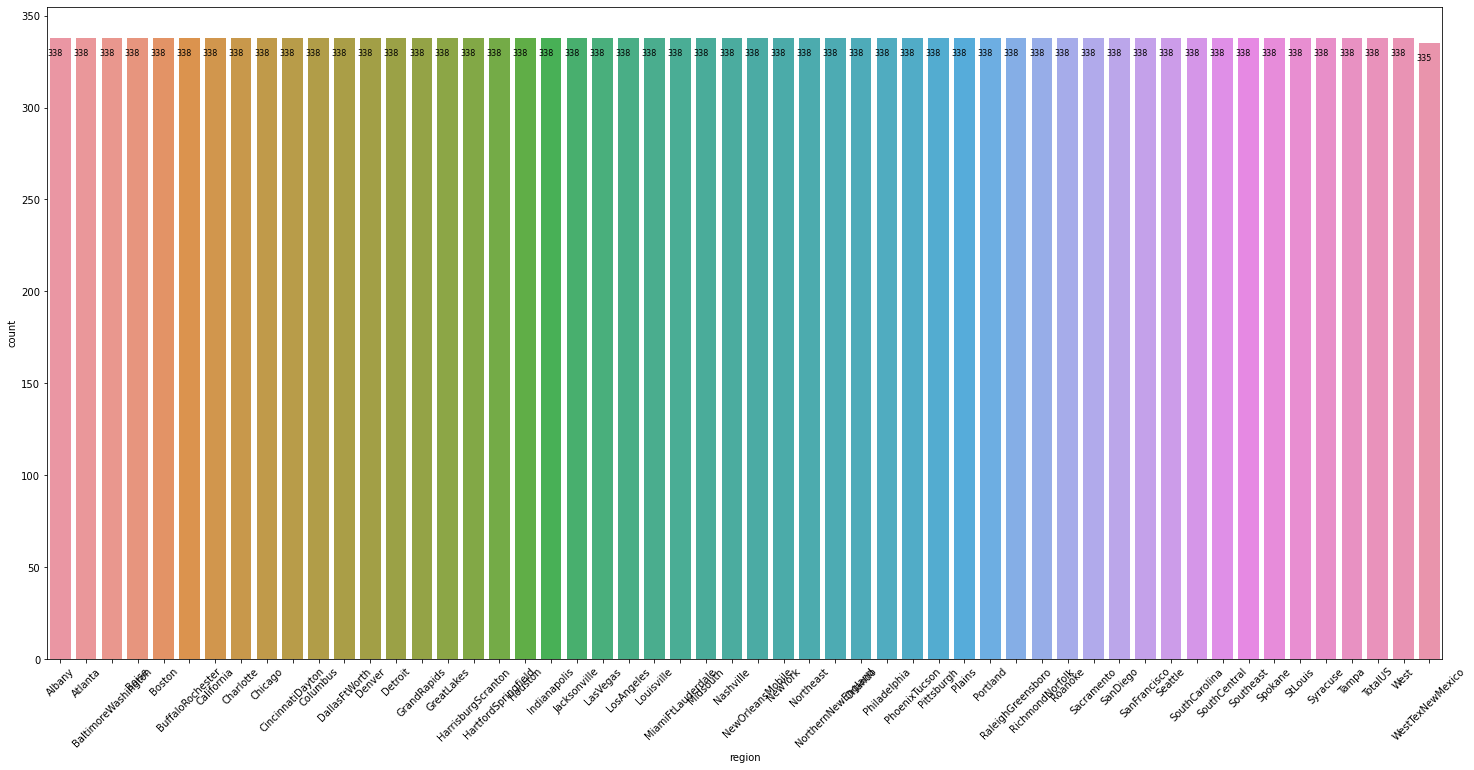

In [22]:
plt.figure(figsize = (25,12))
plt.xticks(rotation = 45)
ax = sns.countplot(x = 'region', data = avocado_data)

for patch in ax.patches:
    ax.annotate(f'\n{patch.get_height()}', (patch.get_x() + 0.2, patch.get_height()), ha = 'center', va = 'top', color = 'black', size = 8)

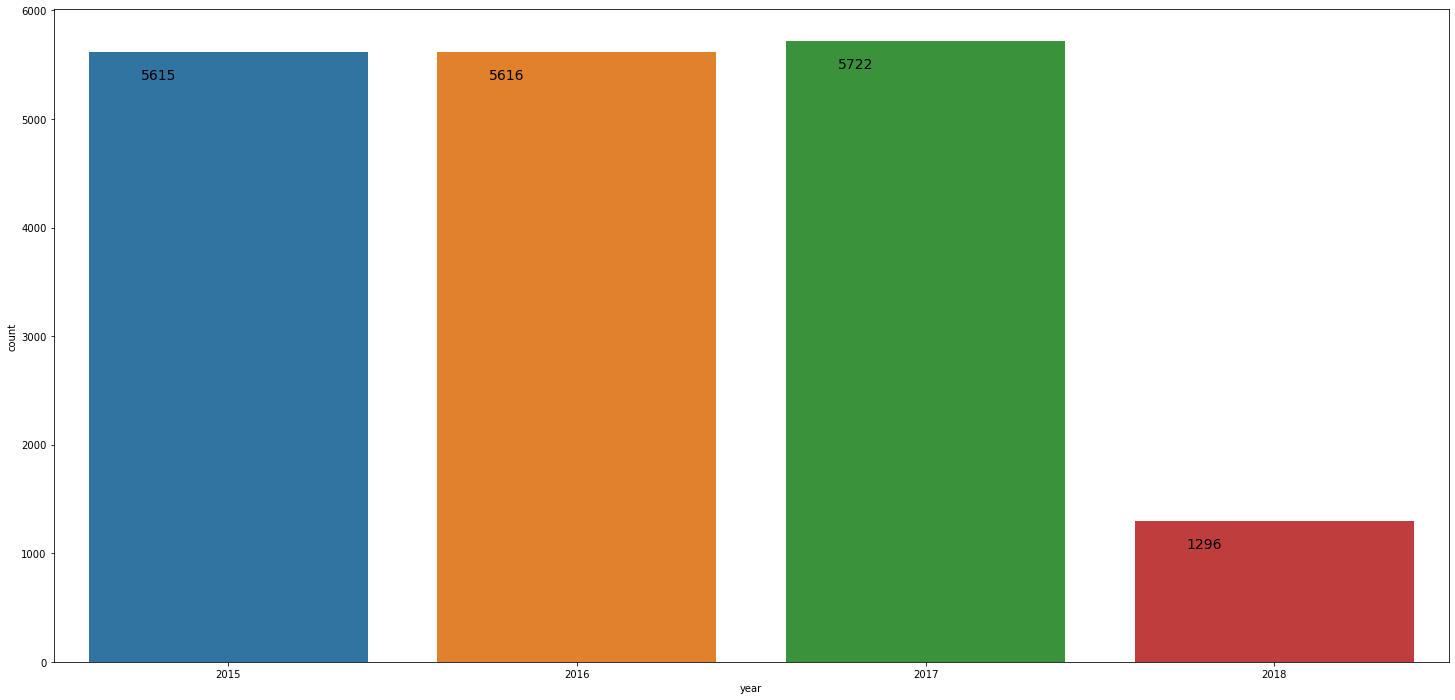

In [23]:
plt.figure(figsize = (25,12))
ax = sns.countplot(x = 'year', data = avocado_data)

for patch in ax.patches:
    ax.annotate(f'\n{patch.get_height()}', (patch.get_x() + 0.2, patch.get_height()), ha = 'center', va = 'top', color = 'black', size = 14)

## Making Predictions

In [26]:
# Filter to just the Total US data, and select just the date and average price columns.
prophet_avocado_data = avocado_data[avocado_data['region']=='TotalUS']
prophet_avocado_data = prophet_avocado_data[['Date', 'AveragePrice']]

# Prophet requires that the time series have columns named 'ds' and 'y'.
prophet_avocado_data = prophet_avocado_data.rename(columns = {'Date':'ds', 'AveragePrice': 'y'})
prophet_avocado_data

,ds,y
2703,2015-01-04,0.95
11829,2015-01-04,1.46
2702,2015-01-11,1.01
11828,2015-01-11,1.42
2701,2015-01-18,1.03
...,...,...
18215,2018-03-11,1.52
9091,2018-03-18,1.05
18214,2018-03-18,1.54
9090,2018-03-25,1.03


In [27]:
avocado_prophet = Prophet(weekly_seasonality = False, daily_seasonality = False)
avocado_prophet.fit(prophet_avocado_data)

In [28]:
future_data = avocado_prophet.make_future_dataframe(periods = 365)
forecast = avocado_prophet.predict(future_data)

forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.232025,0.803684,1.462258,1.232025,1.232025,-0.105738,-0.105738,-0.105738,-0.105738,-0.105738,-0.105738,0.0,0.0,0.0,1.126288
1,2015-01-11,1.232588,0.806280,1.495898,1.232588,1.232588,-0.088694,-0.088694,-0.088694,-0.088694,-0.088694,-0.088694,0.0,0.0,0.0,1.143895
2,2015-01-18,1.233152,0.801478,1.460278,1.233152,1.233152,-0.086481,-0.086481,-0.086481,-0.086481,-0.086481,-0.086481,0.0,0.0,0.0,1.146671
3,2015-01-25,1.233715,0.806597,1.454547,1.233715,1.233715,-0.106497,-0.106497,-0.106497,-0.106497,-0.106497,-0.106497,0.0,0.0,0.0,1.127217
4,2015-02-01,1.234278,0.765138,1.430284,1.234278,1.234278,-0.135999,-0.135999,-0.135999,-0.135999,-0.135999,-0.135999,0.0,0.0,0.0,1.098279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.608465,1.181536,1.845828,1.598585,1.618091,-0.092455,-0.092455,-0.092455,-0.092455,-0.092455,-0.092455,0.0,0.0,0.0,1.516009
530,2019-03-22,1.608788,1.175146,1.848774,1.598848,1.618450,-0.087837,-0.087837,-0.087837,-0.087837,-0.087837,-0.087837,0.0,0.0,0.0,1.520951
531,2019-03-23,1.609110,1.206522,1.879799,1.599117,1.618809,-0.082915,-0.082915,-0.082915,-0.082915,-0.082915,-0.082915,0.0,0.0,0.0,1.526195
532,2019-03-24,1.609433,1.211931,1.869994,1.599367,1.619168,-0.077753,-0.077753,-0.077753,-0.077753,-0.077753,-0.077753,0.0,0.0,0.0,1.531680


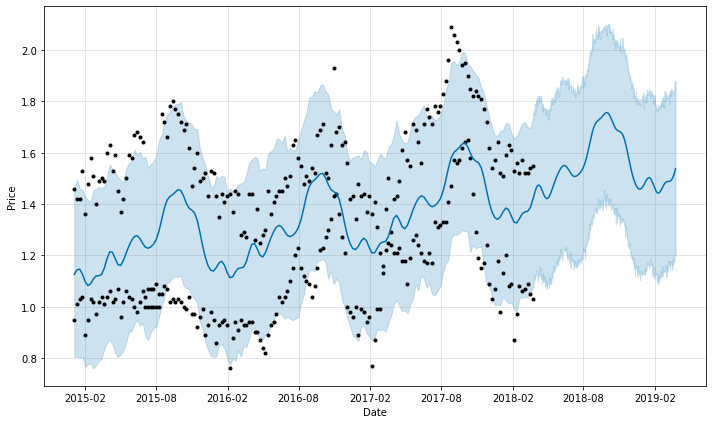

In [29]:
figure = avocado_prophet.plot(forecast, xlabel = 'Date', ylabel = 'Price')

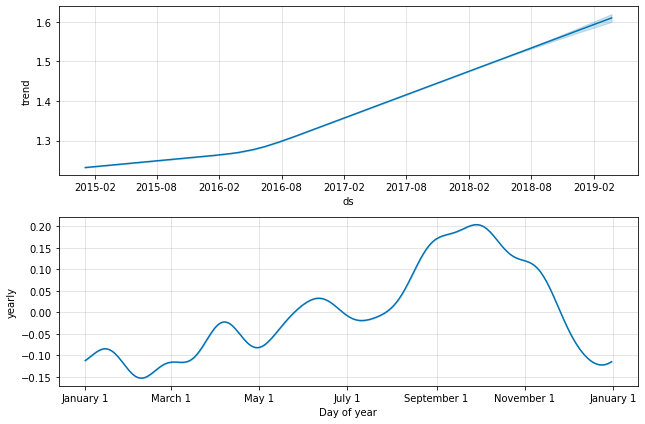

In [30]:
figure = avocado_prophet.plot_components(forecast)